<a href="https://colab.research.google.com/github/OscarLeoSanchez/AttendanceAnalysis/blob/main/TutoriasAsistencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQ8ytIQY5R6ZOcXtlAhC9IrIyhZwq9ZvZypMHNn9uiUaaCk3ysAXHhWtS3bRtJ1Wr7EMaGFBuxLbn80/pub?gid=741721663&single=true&output=csv'
df = pd.read_csv(url)
df['Fecha'] = pd.to_datetime(df['Fecha'],  infer_datetime_format=True)#format="%d/%m/%Y",
# df.set_index('Fecha', inplace=True)
df = df.sort_values(["Fecha"])

Asistencias registrada de cada usuario con cada tutor

In [27]:
agrup=df.groupby(['Tutor','Usuario']).agg({'Usuario':'size'})
agrup.columns=['tutorias']
agrup

tutorias
Tutor                  Usuario              
Angy Hidalgo Madrid    agarzonme          29
                       anriascosc          3
                       avaquiro            8
                       cmunozlo            5
                       cpidiachi           2
...                                      ...
William Eduardo Chautá uvillamarin         1
                       wigomezb            1
                       ycarrero            5
                       ylizarazor          2
                       ymogollon           4

[426 rows x 1 columns]

Usuarios que asitieron a más de 10 tutorías con Angy

In [28]:
t1='Angy Hidalgo Madrid'
a=agrup.loc[[t1]]
a[a['tutorias']>10]

tutorias
Tutor               Usuario             
Angy Hidalgo Madrid agarzonme         29
                    fsandoval         12
                    jacamachoh        20
                    liavilap          19

Usuarios que asistieron a más de 10 tutorías con Oscar

In [29]:
t2='Oscar Leonel Sánchez'
c=agrup.loc[[t2]]
c[c['tutorias']>10]

tutorias
Tutor                Usuario             
Oscar Leonel Sánchez cortizan          19
                     jacamachoh        27
                     magalviss         11

Número de estudiantes que asistieron con cada tutor

In [30]:
cols = ['Fecha', 'Usuario', 'Asignatura', 'Motivo de Consulta', 'Tutor','Medio de Tutoría']
df = df[cols]
dif_student = df.groupby('Tutor').Usuario.nunique().reset_index(name='Num. Estudiantes').set_index('Tutor')
dif_student

,Num. Estudiantes
Tutor,
Angy Hidalgo Madrid,38
Carolina Dominguez Sánchez,41
Dana Paula Ortiz Charry,16
Daniel Alejandro Saavedra,68
Daniela Fernanda Herrera,22
Lida Ángela Burbano,64
Luis Hinojosa Zambrano,30
Oscar Leonel Sánchez,43
Tatiana Bedoya,56


Gráfico de tutorías realizadas por cada tutor

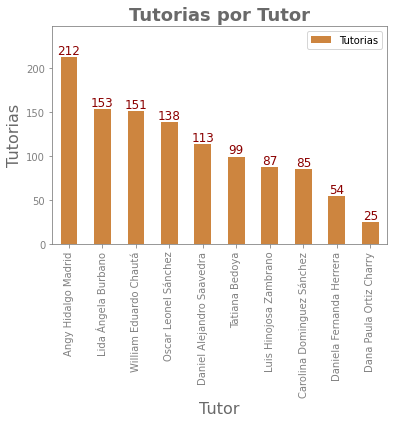

In [31]:
tuto_tutor = df.groupby('Tutor').size().reset_index(name='Tutorias').sort_values('Tutorias', ascending=False).set_index('Tutor')

ax = tuto_tutor.plot(kind='bar', color='peru')

rects = ax.patches
labels = tuto_tutor['Tutorias'].tolist()
ax.set_title('Tutorias por Tutor',fontsize=18, color='dimgray', fontweight='bold')
ax.set_ylabel('Tutorias', fontsize=16,color='dimgray')
ax.set_xlabel('Tutor', fontsize=16,color='dimgray')
maximo = tuto_tutor['Tutorias'].max()
ax.set_ylim(0, maximo+maximo//6)

for rect, label in zip(rects, labels):
  height = rect.get_height()
  ax.text(rect.get_x()+rect.get_width()/2, height, label, fontsize=12, ha='center', va='bottom', color='darkred')

ax.spines['bottom'].set_color('grey')
ax.spines['top'].set_color('grey')
ax.spines['right'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.tick_params(axis='y', color='grey')
ax.tick_params(axis='x', color='grey')
# [t.set_color('red') for t in ax.xaxis.get_ticklines()]
[t.set_color('grey') for t in ax.xaxis.get_ticklabels()]
[t.set_color('grey') for t in ax.yaxis.get_ticklabels()]

plt.show()

Tutorias realizadas mensual por todos los tutores

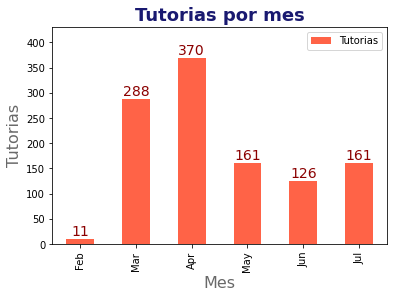

In [33]:
c_month = {'01': 'Jan', '02': 'Feb', '03': 'Mar', '04': 'Apr', '05': 'May','06': 'Jun', '07': 'Jul', '08': 'Aug', '09': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'}
# df1 = df.copy()
# df1.set_index('Fecha',inplace=True)
# df1.resample('M').sum()
df_tuto_mouth = df.groupby(df['Fecha'].dt.strftime('%m'))['Usuario'].size().reset_index(name='Tutorias')
# p = df.groupby(df['Fecha'].dt.strftime('m'),df['Tutor']).size()
# type(df.iloc[0,0])
# df_tuto_mouth.sort_values(by=['Fecha'], inplace=True, ignore_index=True)
df_tuto_mouth['Mes'] = df_tuto_mouth['Fecha']
df_tuto_mouth.drop('Fecha',axis=1)
# df_tuto_mouth['Mes'] = df_tuto_mouth['Mes'].apply(lambda x: calendar.month_abbr[x])
df_tuto_mouth['Mes'] = df_tuto_mouth['Mes'].apply(lambda x: c_month[x])
df_tuto_mouth.drop('Fecha', axis=1, inplace=True)
df_tuto_mouth.set_index('Mes', inplace=True)
ax=df_tuto_mouth.plot(kind='bar',color='tomato')
rects = ax.patches
labels = df_tuto_mouth['Tutorias'].tolist()
ax.set_title('Tutorias por mes',fontsize=18, color='midnightblue', fontweight='bold')
ax.set_ylabel('Tutorias', fontsize=16,color='dimgray')
ax.set_xlabel('Mes', fontsize=16,color='dimgray')
maximo = df_tuto_mouth['Tutorias'].max()
ax.set_ylim(0, maximo+maximo//6)
for rect, label in zip(rects, labels):
  height = rect.get_height()
  ax.text(rect.get_x()+rect.get_width()/2, height, label, fontsize=14, ha='center', va='bottom', color='darkred')
plt.show()


Tutorias realizadas mensualmente por cada tutor

In [34]:
import calendar

df['Mes'] = df['Fecha'].dt.month
df_tt_st = df.groupby(['Tutor', 'Mes']).size().reset_index(name='Tutorias')
df_tt_st['Mes'] = df_tt_st['Mes'].apply(lambda x: calendar.month_abbr[x] )
df_tt_st.set_index(['Tutor','Mes'],inplace=True)
# df_tt_st.reset_index(inplace=True)
df_tt_st

Tutorias
Tutor                      Mes          
Angy Hidalgo Madrid        Feb         6
                           Mar        68
                           Apr        74
                           May        28
                           Jun        10
                           Jul        26
Carolina Dominguez Sánchez Mar        39
                           Apr         9
                           May        10
                           Jun        19
                           Jul         8
Dana Paula Ortiz Charry    Mar         3
                           Apr        11
                           May         3
                           Jun         7
                           Jul         1
Daniel Alejandro Saavedra  Feb         1
                           Mar        37
                           Apr        28
                           May        11
                           Jun         8
                           Jul        28
Daniela Fernanda Herrera   Mar         9
                           Apr        20
                           May         9
                           Jun         2
                           Jul        14
Lida Ángela Burbano        Feb         1
                           Mar        31
                           Apr        63
                           May        41
                           Jun        17
Luis Hinojosa Zambrano     Mar        27
                           Apr        21
                           May        11
                           Jun        12
                           Jul        16
Oscar Leonel Sánchez       Feb         2
                           Mar        32
                           Apr        36
                           May        30
                           Jun        22
                           Jul        16
Tatiana Bedoya             Mar        20
                           Apr        41
                           May         1
                           Jun        21
                           Jul        16
William Eduardo Chautá     Feb         1
                           Mar        22
                           Apr        67
                           May        17
                           Jun         8
                           Jul        36

In [35]:
# df_tt_st.rename(columns=df_tt_st.iloc[0]).drop(df.index[0])
df_tt_st.reset_index(inplace=True)

In [36]:
tutor_list = df['Tutor'].unique()
for i in range(len(tutor_list)):
  print(i, ' : ', tutor_list[i])

0  :  Oscar Leonel Sánchez
1  :  Angy Hidalgo Madrid
2  :  Lida Ángela Burbano
3  :  Daniel Alejandro Saavedra
4  :  William Eduardo Chautá
5  :  Luis Hinojosa Zambrano
6  :  Carolina Dominguez Sánchez
7  :  Tatiana Bedoya
8  :  Dana Paula Ortiz Charry
9  :  Daniela Fernanda Herrera


Tutorias mensuales realizadas por el tutor *num_of_tutor*

In [38]:
num_of_tutor = 0
tutor = tutor_list[num_of_tutor]
# t_tutor = df_tt_st[df_tt_st['Tutor']==tutor].drop('Tutor', axis=1)
t_tutor = df_tt_st[df_tt_st['Tutor']==tutor]
t_tutor = t_tutor.drop('Tutor', axis=1)
t_tutor.set_index(['Mes'], inplace=True)
t_tutor

,Tutorias
Mes,
Feb,2
Mar,32
Apr,36
May,30
Jun,22
Jul,16


Gráfico de barras de las tutorías mensuales realizadas por el tutor *num_of_tutor* 

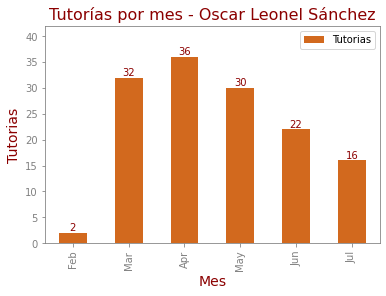

In [40]:
ax = t_tutor.plot(kind='bar',color='chocolate')
rects = ax.patches
ax.set_title('Tutorías por mes - %s'%tutor, fontsize=16, color='darkred', fontweight='normal')
ax.set_ylabel('Tutorias', fontsize=14, color='darkred')
ax.set_xlabel('Mes', fontsize=14, color='darkred')
plt.ylim(0,t_tutor['Tutorias'].max()+t_tutor['Tutorias'].max()//6)
# Make some labels.
labels = t_tutor['Tutorias'].tolist()

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height , label,
            ha='center', va='bottom', color='darkred')
    
ax.spines['bottom'].set_color('grey')
ax.spines['top'].set_color('grey')
ax.spines['right'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.tick_params(axis='y', color='grey')
ax.tick_params(axis='x', color='grey')
# [t.set_color('red') for t in ax.xaxis.get_ticklines()]
[t.set_color('grey') for t in ax.xaxis.get_ticklabels()]
[t.set_color('grey') for t in ax.yaxis.get_ticklabels()]
ax.set_rasterized(True)
plt.savefig("fig1.eps",bbox_inches='tight')
plt.show()